<a href="https://colab.research.google.com/github/tsenga2/keio-quant-macro/blob/main/GrowthAccounting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr
import numpy as np
#year 年
#countrycode　国名
#rgdpna　実質GDP
#rnna　実質資本ストック
#pop　総人口
#emp　雇用者数
#avh 平均労働時間
#labsh 消費割合
#rtfpna TFP
def calculate_growth_accounting(df, country):
    # Filter and select relevant columns for the specified country
    data = df.loc[df['country'] == country][['year', 'countrycode', 'rgdpna', 'rnna', 'pop', 'emp', 'avh', 'labsh', 'rtfpna']]
    data = data.loc[(data['year'] >= 1999) & (data['year'] <= 2019)].dropna()
    
    if data.empty:
        return None
    
    # Calculate additional variables
    data['alpha'] = 1 - data['labsh']
    data['y_n'] = data['rgdpna'] / data['emp']  # Y/N
    data['hours'] = data['emp'] * data['avh']  # L
    data['y_l'] = data['rgdpna'] / data['hours']  # Y/L
    data['k'] = data['rnna'] / data['hours']  # K/L

    # Extract necessary data
    firstA = data['rtfpna'].iloc[0]
    lastA = data['rtfpna'].iloc[-1]
    firstY = data['y_l'].iloc[0]
    lastY = data['y_l'].iloc[-1]
    firstK = data['k'].iloc[0]
    lastK = data['k'].iloc[-1]

    # Calculate growth rates and shares
    gg = lastY / firstY
    ga = lastA / firstA
    gk = (lastK / firstK) * data['alpha'].mean()

    a = ga
    k = gk
    s_a = a / (a + k)
    s_k = k / (a + k)

    return {
        'country': country,
        'gg': gg,
        'ga': ga,
        'gk': gk,
        's_a': s_a,
        's_k': s_k
    }

# List of countries
countries = [
    "Australia",
    "Austria",
    "Belgium",
    "Canada",
    "Denmark",
    "Finland",
    "France",
    "Germany",
    "Greece",
    "Iceland",
    "Ireland",
    "Italy",
    "Japan",
    "Netherlands",
    "New Zealand",
    "Norway",
    "Portugal",
    "Spain",
    "Sweden",
    "Switzerland",
    "United Kingdom",
    "United States"
]

# Load data from CSV file
df = df = pd.read_csv("pwt100.csv")

# List to store results
results = []

# Iterate over each country and calculate growth accounting
for country in countries:
    result = calculate_growth_accounting(df, country)
    if result:
        results.append(result)

# Create a dataframe from the results
results_df = pd.DataFrame(results)

# Display the dataframe
results_df

,country,gg,ga,gk,s_a,s_k
0,Australia,1.230548,1.045326,0.512444,0.671040,0.328960
1,Austria,1.259367,1.060727,0.513615,0.673759,0.326241
2,Belgium,1.138838,1.016253,0.432734,0.701354,0.298646
3,Canada,1.227116,1.036411,0.482864,0.682175,0.317825
4,Denmark,1.293431,1.078842,0.464381,0.699084,0.300916
5,Finland,1.256513,1.038969,0.560966,0.649382,0.350618
6,France,1.217229,1.020272,0.466109,0.686413,0.313587
7,Germany,1.213289,1.100052,0.430937,0.718524,0.281476
8,Greece,1.136375,0.914228,0.590538,0.607555,0.392445
9,Iceland,1.679051,1.318180,0.488314,0.729689,0.270311


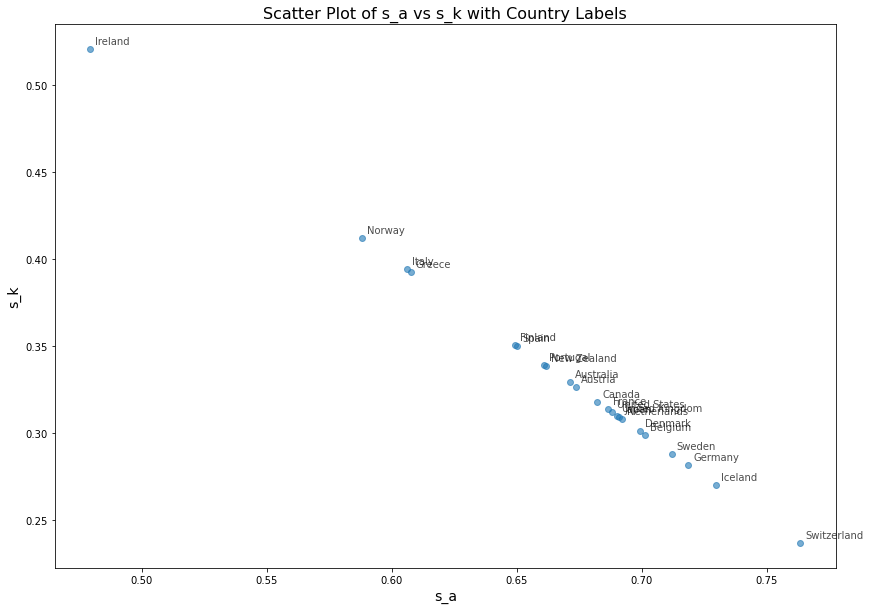

In [3]:
# 散布図を作成
plt.figure(figsize=(14, 10))
scatter = plt.scatter(results_df['s_a'], results_df['s_k'], alpha=0.6)

# 各点に国名をラベルとして追加（被りを避けるため少しずらす）
for i, country in enumerate(results_df['country']):
    plt.annotate(country, 
                 (results_df['s_a'][i], results_df['s_k'][i]), 
                 fontsize=10, 
                 alpha=0.7, 
                 xytext=(5, 5), 
                 textcoords='offset points')

# グラフの装飾
plt.xlabel('s_a', fontsize=14)
plt.ylabel('s_k', fontsize=14)
plt.title('Scatter Plot of s_a vs s_k with Country Labels', fontsize=16)

# グラフを表示
plt.show()

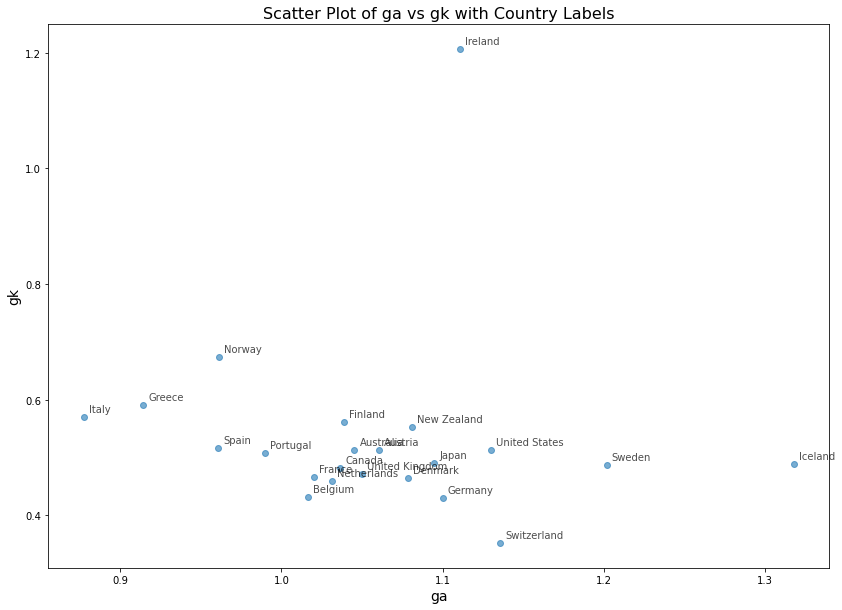

In [4]:
# ga と gk の散布図を作成
plt.figure(figsize=(14, 10))
plt.scatter(results_df['ga'], results_df['gk'], alpha=0.6)

# 各点に国名をラベルとして追加（被りを避けるため少しずらす）
for i, country in enumerate(results_df['country']):
    plt.annotate(country, 
                 (results_df['ga'][i], results_df['gk'][i]), 
                 fontsize=10, 
                 alpha=0.7, 
                 xytext=(5, 5), 
                 textcoords='offset points')

# グラフの装飾
plt.xlabel('ga', fontsize=14)
plt.ylabel('gk', fontsize=14)
plt.title('Scatter Plot of ga vs gk with Country Labels', fontsize=16)

# グラフを表示
plt.show()
